In [6]:
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
sys.path.append("../../src")
from lr_tools import lr_calibrate
from models import MLP
from data import gen_rnd_ds
from losses import LinearClassification
from block_analysis import block_hessian, curvature_effects

## Helpers

In [8]:
def get_model_ds_loss():    
    model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
    ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
                   out_dim, nsamp, device)
    loss_fn = LinearClassification(out_dim)
    return model, ds, loss_fn

## Params

In [9]:
# Model
mode = "linear"
bias = False
nlayer = 5
inp_dim = 10 
out_dim = 10
hid_dim = 100

# Data parameters
nsamp = 100
inp_mean = 0
inp_var = 1

# Others
device = 0
lr = 7

In [10]:
model, ds, loss_fn = get_model_ds_loss()

In [13]:
lr_calibrate(model, ds, loss_fn)

LR -8.00E+00 	 || Delta=-2.25E-01	 ||Error=6.49E-02  	|| hoe=-1.03E-04 	|| H=-1.10E-04	||ratio=9.39E-01
LR -7.00E+00 	 || Delta=-1.97E-01	 ||Error=5.62E-02  	|| hoe=-1.04E-04 	|| H=-1.10E-04	||ratio=9.47E-01
LR -6.00E+00 	 || Delta=-1.69E-01	 ||Error=4.76E-02  	|| hoe=-1.05E-04 	|| H=-1.10E-04	||ratio=9.55E-01
LR -5.00E+00 	 || Delta=-1.41E-01	 ||Error=3.93E-02  	|| hoe=-1.06E-04 	|| H=-1.10E-04	||ratio=9.62E-01
LR -4.00E+00 	 || Delta=-1.13E-01	 ||Error=3.11E-02  	|| hoe=-1.07E-04 	|| H=-1.10E-04	||ratio=9.70E-01
LR -3.00E+00 	 || Delta=-8.50E-02	 ||Error=2.30E-02  	|| hoe=-1.08E-04 	|| H=-1.10E-04	||ratio=9.78E-01
LR -2.00E+00 	 || Delta=-5.68E-02	 ||Error=1.52E-02  	|| hoe=-1.08E-04 	|| H=-1.10E-04	||ratio=9.85E-01
LR -1.00E+00 	 || Delta=-2.84E-02	 ||Error=7.67E-03  	|| hoe=-1.09E-04 	|| H=-1.10E-04	||ratio=9.92E-01
LR 0.00E+00 	 || Delta=0.00E+00	 ||Error=NAN  	|| hoe=NAN 	|| H=NAN	||ratio=NAN
LR 1.00E+00 	 || Delta=2.85E-02	 ||Error=7.10E-03  	|| hoe=-1.11E-04 	|| H=-1.10E-04	||r

../../src/lr_tools.py:36: RuntimeWarning: invalid value encountered in less
  diff = abs(diff)<1e-4


LR -1.20E+00 	 || Delta=-3.41E-02	 ||Error=9.10E-03  	|| hoe=-1.09E-04 	|| H=-1.10E-04	||ratio=9.91E-01
LR -1.00E+00 	 || Delta=-2.84E-02	 ||Error=7.67E-03  	|| hoe=-1.09E-04 	|| H=-1.10E-04	||ratio=9.92E-01
LR -8.00E-01 	 || Delta=-2.28E-02	 ||Error=6.05E-03  	|| hoe=-1.09E-04 	|| H=-1.10E-04	||ratio=9.94E-01
LR -6.00E-01 	 || Delta=-1.71E-02	 ||Error=4.57E-03  	|| hoe=-1.10E-04 	|| H=-1.10E-04	||ratio=9.95E-01
LR -4.00E-01 	 || Delta=-1.14E-02	 ||Error=3.43E-03  	|| hoe=-1.10E-04 	|| H=-1.10E-04	||ratio=9.97E-01
LR -2.00E-01 	 || Delta=-5.70E-03	 ||Error=1.29E-03  	|| hoe=-1.10E-04 	|| H=-1.10E-04	||ratio=9.99E-01
LR -4.44E-16 	 || Delta=0.00E+00	 ||Error=6.54E-08  	|| hoe=-1.28E+14 	|| H=-1.28E+14	||ratio=1.00E+00
-0.40000000000000036 -0.2000000000000004 -4.440892098500626e-16
LR -4.00E-01 	 || Delta=-1.14E-02	 ||Error=3.43E-03  	|| hoe=-1.10E-04 	|| H=-1.10E-04	||ratio=9.97E-01
LR -3.60E-01 	 || Delta=-1.02E-02	 ||Error=5.25E-03  	|| hoe=-1.10E-04 	|| H=-1.10E-04	||ratio=9.95E-01
L

-0.23808000000000043

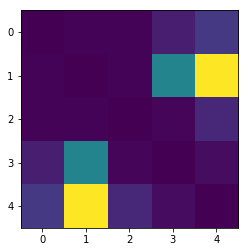

In [14]:
H = block_hessian(model, ds, loss_fn, lr)
plt.imshow(H.abs().cpu().numpy())